In [48]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [102]:
COUNTRY_DATA = {
        "USA": "United States",
        "ESP": "Spain",
        "HUN": "Hungary",
        "MAR": "Morocco",
        "CHL": "Chile",
        "HRV": "Croatia",
        "JPN": "Japan",
        "FIN": "Finland",
        "DEU": "Germany",
        "NZL": "New Zealand",
        "JOR": "Jordan",
        "ZAF" : "South Africa"
        # Add more countries as needed
    }

ADV_COUNTRIES  = [
        "USA",
        "ESP",
        "JPN",
        "FIN",
        "DEU",
        "NZL",
    ]

EMER_COUNTRIES = [
    "MAR",
    "CHL",
    "JOR",
    "ZAF",
    "HUN",
    "HRV",
]

INDICATORS = {
    "Population": "LP",
    "current account balance": "BCA_NGDPD",
    #"General government total expenditure": "GGX_NGDP",
    "General government net lending/borrowing": "GGXCNL_NGDP",
    #"General government structural balance": "GGXONLB_NGDP",
    #"General Government Revenue": "GGR_NGDP",
    "General government gross debt": "GGXWDG_NGDP",
    "Unemployment rate": "LUR",
    "GDP per Capita": "NGDPDPC",
    "Government revenue (% of GDP)": "rev",
    "Government expenditure (% of GDP)": "exp",
    "Gross public debt": "d",
    "Real GDP growth rate": "rgc",
    #"Export Quality Index": "SITC1_total",
    "Household Debt": "HH_ALL",
    #"Public Sector Debt (% of GDP)": "PS_DEBT_GDP",
    #"Trade balance (% of GDP)": "BT_GDP",
    #"Gross national savings (% of GDP)": "NGS_GDP"
    #"Gross national savings": "NGSD_NGDP",
    #"Total investment": "NID_NGDP"
}
TIME_SPAN = list(range(2018, 2023+1)) 

BASE_URL = "https://www.imf.org/external/datamapper/api/v1/"


In [43]:
def parseData(rawData):
    countries = []
    years = []
    values = []
    for country in data.keys():
        country_data = data[country]
        countries += [country]*len(country_data)
        years += country_data.keys()
        values += country_data.values()
        
    dfSource = {
        "Country": countries,
        "Year": years,
        indicator_id: values,
    }
    return pd.DataFrame(dfSource)

In [44]:
def mergeDFs(main_df, new_df):
    if main_df is None:
        return new_df
    else:
        return pd.merge(main_df, new_df, on=["Country","Year"], how="outer")

In [45]:
country_codes = "/".join(COUNTRY_DATA.keys())
periods = ",".join((str(y) for y in TIME_SPAN))

In [46]:
main_df = None
for indicator_name, indicator_id in INDICATORS.items():
    #for year in [2018]: #TIME_SPAN:
    #url = f"{base_url}/{indicator_id}/{country_code}?periods={year}"
    url = f"{BASE_URL}/{indicator_id}/{country_codes}?periods={periods}"
    print(url)
    #try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()["values"][indicator_id]
        indicator_df = parseData(data)
        main_df = mergeDFs(main_df, indicator_df)
    else:
        print(response.status_code)
       

https://www.imf.org/external/datamapper/api/v1//LP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//BCA_NGDPD/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//GGXCNL_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//GGXWDG_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//LUR/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//NGDPDPC/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023,2024,2025
https://www.imf.org/external/datamapper/api/v1//rev/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU

In [113]:
#main data indicators data frame 
main_df
#advanced countries data frame
advanced_df = main_df.loc[main_df["Country"].isin(ADV_COUNTRIES)]
advanced_df.reset_index(drop = True, inplace = True)
#emerging countries data frame
emerging_df = main_df.loc[main_df["Country"].isin(EMER_COUNTRIES)]
emerging_df.reset_index(drop = True, inplace = True)
advanced_df

,Country,Year,LP,BCA_NGDPD,GGXCNL_NGDP,GGXWDG_NGDP,LUR,NGDPDPC,rev,exp,d,rgc,HH_ALL
0,DEU,2018,82.906,8.0,1.9,61.9,3.2,47961.181,46.270900,44.320997,61.316347,0.983762,52.664577
1,DEU,2019,83.093,8.2,1.5,59.5,3.0,46810.283,46.528809,45.002547,58.925563,1.070506,53.503049
2,DEU,2020,83.161,7.1,-4.3,68.7,3.6,46711.984,46.122489,50.461788,67.986011,-3.829225,57.055937
3,DEU,2021,83.196,7.7,-3.6,69.0,3.6,51460.987,47.349984,50.936516,68.622975,3.168678,56.755744
4,DEU,2022,83.798,4.2,-2.5,66.1,3.1,48756.309,46.977618,49.477354,66.535292,1.804266,55.238489
5,DEU,2023,83.861,6.0,-2.9,65.9,3.3,52823.575,NaN,NaN,NaN,NaN,NaN
6,DEU,2024,83.889,6.6,-1.7,64.0,3.3,56036.840,NaN,NaN,NaN,NaN,NaN
7,DEU,2025,83.881,6.5,-0.9,61.8,3.1,59134.893,NaN,NaN,NaN,NaN,NaN
8,ESP,2018,46.729,1.9,-2.6,100.4,15.3,30438.338,39.218879,41.812538,100.415481,2.283134,62.889009
9,ESP,2019,47.105,2.1,-3.1,98.2,14.1,29603.298,39.223677,42.283942,98.221004,1.983288,60.804263


In [126]:
#pulling specific columns
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_emer_df = advanced_df.iloc[:,[0, 1, 2, 10]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 2, 10]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,LP,d
0,CHL,2018,18.751,25.798028
1,CHL,2019,19.107,28.297729
2,CHL,2020,19.458,32.352589
3,CHL,2021,19.678,36.303300
4,CHL,2022,19.829,37.975480
5,CHL,2023,19.961,NaN
6,CHL,2024,20.086,NaN
7,CHL,2025,20.207,NaN
8,HRV,2018,4.088,74.452168
9,HRV,2019,4.065,71.945971


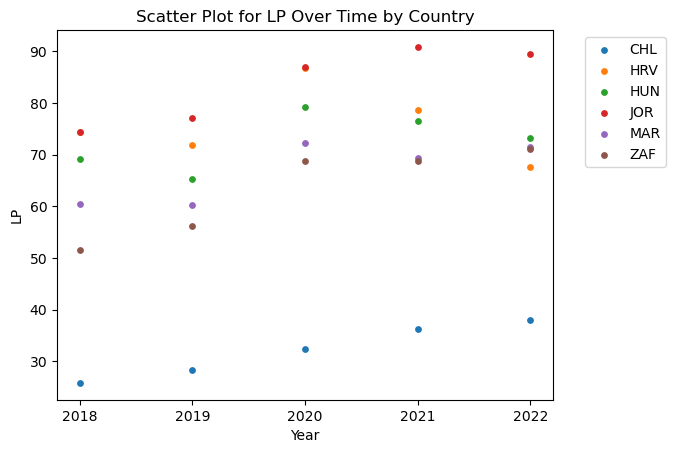

In [127]:
#code to do a scatter plots
countries_colors = {
        'United States' :'red',
        'Spain' : 'blue',
        "Hungary" : "yellow",
        "Morocco" : "green",
        "Chile" : "black",
        "Croatia" : "orange",
        "Japan" : "violet",
        "Finland" : "brown",
        "Germany" : "magenta",
        "New Zealand" : "coral",
        "Jordan" : "sea green",
        "South Africa" : "teal"
}
# plt.scatter(x = <df name>.df["Year"], y = <df name>["LP"], s = 20, c=  <df name>["Country"].cmap(countries_colors))
# plt.scatter(<df name>["Year"], <df name>["LP"])
# plt.show()

for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.scatter(selected_emer_df['Year'], selected_emer_df['d'], label=country, s=15)

plt.xlabel('Year')
plt.ylabel('LP')
plt.title('Scatter Plot for LP Over Time by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [108]:
#selected_df = pd.DataFrame()
#selected_df = main_df.iloc[:,[0,1,2]]
#selected_df_columns= selected_df.columns()
#advanced_df = selected_df["Country"].isin(ADV_COUNTRIES)
#.filter(ADV_COUNTRIES, axis = selected_df_columns)
#emerging_df = selected_df.filter(EMER_COUNTRIES, axis = selected_df_columns)
#main_df.dropna()
#selected_data = "Year","LP"
#main_df[selected_data]
#clean_data = main_df[[selected_data]].dropna()
#main_df["LP"]
#stupid_df = pd.DataFrame()
#stupid_df["Year","LP"].dropna()


# for country in selected_df["Country"]:
#     for country in COUNTRY_DATA.keys():
#         if country

#sub_df = pd.DataFrame.loc(main_df["Year"])
#sub_df.columns("Year","Population")